In [1]:
from src.acoustic_analyser import frame
import numpy as np

test_frame = frame.from_file(
    member_file="test_member.json", constraint_file="test_constraint.csv", debug=False
)

free_end = test_frame.fixed_end(member_id=0)
free_end = test_frame.free_end(member_id=3)

In [2]:
test_frame.get_determinant(w=2 * np.pi * 13.74)

(-4.985620703437661e-06-1.0202193438770063e-05j)

In [134]:
test_frame.get_natural_frequency_newton(initial_guess=13)

Determinant: (-1.9789594506374817e-05-5.702386671261734e-05j)
Determinant: (-1.9774789839807467e-05-5.693871170213575e-05j)
Determinant: (2.3873507886657814e-06+4.4684536347078085e-06j)
Determinant: (-1.2676177184674352e-07-2.4401193059983066e-07j)
Determinant: (-3.499592272890332e-10-6.726747993528352e-10j)
Determinant: (5.366142656525862e-14+1.0496862082812047e-13j)
Determinant: (-6.387457942448606e-16+5.259426836504137e-16j)


13.897070478349427

In [4]:
# _ = test_frame.get_frequency_graph(lower_limit=4, upper_limit=7, step_size=0.1)
# # test_frame.get_natural_frequency_newton(initial_guess=10)
# test_frame.get_natural_frequency_bisect(lower_limit=5, upper_limit=5.5)

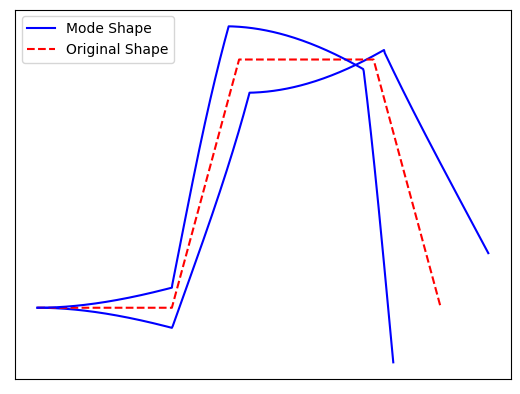

In [136]:
mode_shape, _, orignal_shape = test_frame.get_mode_shape(
    natural_freq=13.897, step_size=0.005, scaling_factor=0.25
)

In [130]:
# Validate mode shape
import pandas as pd

ux = pd.read_csv("ux.csv", index_col=0)
uy = pd.read_csv("uy.csv", index_col=0)
ansys_result = pd.read_csv("nodes.csv", index_col=0)
ansys_result["ux_ansys"] = ux["ux"]
ansys_result["uy_ansys"] = uy["uy"]
ansys_result["y"] = ansys_result["y"].round(6)
ansys_result["x"] = ansys_result["x"].round(6)

ansys_result.drop(columns=["z"], inplace=True)

In [131]:
code_result = pd.DataFrame()
code_result["x"] = orignal_shape[:, 0].round(6)
code_result["y"] = orignal_shape[:, 1].round(6)
code_result["ux_python"] = mode_shape[:, 0] - orignal_shape[:, 0]
code_result["uy_python"] = mode_shape[:, 1] - orignal_shape[:, 1]

In [132]:
results = pd.merge(ansys_result, code_result, how="left", on=["x", "y"])

In [133]:
results["ux_ansys"] / results["ux_python"]

0           NaN
1      4.102846
2      4.102848
3      4.102846
4      4.102845
         ...   
396    4.396488
397    4.389430
398    4.382970
399    4.376661
400    4.371202
Length: 401, dtype: float64

In [123]:
results.to_csv("mode_shape_comparision.csv")